<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Modules-Definition" data-toc-modified-id="Modules-Definition-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Modules Definition</a></span></li><li><span><a href="#Define-Special-Subsets" data-toc-modified-id="Define-Special-Subsets-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Define Special Subsets</a></span></li><li><span><a href="#Dataset-Preparation-for-fasttext" data-toc-modified-id="Dataset-Preparation-for-fasttext-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Dataset Preparation for fasttext</a></span><ul class="toc-item"><li><span><a href="#Corpus-Creation" data-toc-modified-id="Corpus-Creation-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Corpus Creation</a></span></li></ul></li><li><span><a href="#FastText-Model-Creation" data-toc-modified-id="FastText-Model-Creation-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>FastText Model Creation</a></span></li><li><span><a href="#Fasttext-Model-Use" data-toc-modified-id="Fasttext-Model-Use-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Fasttext Model Use</a></span><ul class="toc-item"><li><span><a href="#Document-Vectors-Creation" data-toc-modified-id="Document-Vectors-Creation-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Document Vectors Creation</a></span></li></ul></li><li><span><a href="#Clustering-based-on-fasttext" data-toc-modified-id="Clustering-based-on-fasttext-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Clustering based on fasttext</a></span><ul class="toc-item"><li><span><a href="#Clustering-using-NLTK" data-toc-modified-id="Clustering-using-NLTK-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Clustering using NLTK</a></span></li><li><span><a href="#Clustering-using-Sklearn" data-toc-modified-id="Clustering-using-Sklearn-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Clustering using Sklearn</a></span></li><li><span><a href="#Using-Multidimensional-Scaling" data-toc-modified-id="Using-Multidimensional-Scaling-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Using Multidimensional Scaling</a></span></li></ul></li><li><span><a href="#Distance-Matrix" data-toc-modified-id="Distance-Matrix-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Distance Matrix</a></span></li><li><span><a href="#Experimenting-with-Topic-Modeling" data-toc-modified-id="Experimenting-with-Topic-Modeling-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Experimenting with Topic Modeling</a></span><ul class="toc-item"><li><span><a href="#Topic-Modeling-per-Cluster-(using-gensim)" data-toc-modified-id="Topic-Modeling-per-Cluster-(using-gensim)-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Topic Modeling per Cluster (using gensim)</a></span><ul class="toc-item"><li><span><a href="#Separating-per-Cluster" data-toc-modified-id="Separating-per-Cluster-8.1.1"><span class="toc-item-num">8.1.1&nbsp;&nbsp;</span>Separating per Cluster</a></span></li><li><span><a href="#Using-the-Entire-Corpus" data-toc-modified-id="Using-the-Entire-Corpus-8.1.2"><span class="toc-item-num">8.1.2&nbsp;&nbsp;</span>Using the Entire Corpus</a></span></li></ul></li><li><span><a href="#Topic-Modeling-using-Abstracts-Only" data-toc-modified-id="Topic-Modeling-using-Abstracts-Only-8.2"><span class="toc-item-num">8.2&nbsp;&nbsp;</span>Topic Modeling using Abstracts Only</a></span></li><li><span><a href="#Topic-Modeling-for-One-Cluster-Only" data-toc-modified-id="Topic-Modeling-for-One-Cluster-Only-8.3"><span class="toc-item-num">8.3&nbsp;&nbsp;</span>Topic Modeling for One Cluster Only</a></span></li><li><span><a href="#Pearson-Correlation-Between-Documents" data-toc-modified-id="Pearson-Correlation-Between-Documents-8.4"><span class="toc-item-num">8.4&nbsp;&nbsp;</span>Pearson Correlation Between Documents</a></span></li><li><span><a href="#Sklearn-for-Topic-Modeling" data-toc-modified-id="Sklearn-for-Topic-Modeling-8.5"><span class="toc-item-num">8.5&nbsp;&nbsp;</span>Sklearn for Topic Modeling</a></span></li><li><span><a href="#Grid-Search-for-LDA" data-toc-modified-id="Grid-Search-for-LDA-8.6"><span class="toc-item-num">8.6&nbsp;&nbsp;</span>Grid Search for LDA</a></span></li></ul></li></ul></div>

In [3]:
from __future__ import print_function
#import fasttext
import re
import numpy as np
import pandas as pd
from collections import namedtuple
import io
import os
import shutil
from os import path, listdir
import itertools
import pickle
import glob
from gensim.models import KeyedVectors
from nltk.cluster import KMeansClusterer
import nltk
from sklearn import metrics
import scipy.spatial.distance as ssd

import warnings
warnings.filterwarnings(action='once')

import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm
#plt.style.use('ggplot')

from sklearn.decomposition import PCA as sklearnPCA
from sklearn.manifold import TSNE

from sklearn.datasets import load_digits
from sklearn.manifold import MDS
from sklearn import manifold

from sklearn.utils import shuffle
from sklearn.utils import check_random_state
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import KMeans

import pyLDAvis
import pyLDAvis.sklearn

import utils
import importlib
importlib.reload(utils)

<module 'utils' from '/home/mcaserta/research/matheur/utils.py'>

# Modules Definition

In [4]:
def createMap(mappingFile):
    dfMap = pd.read_csv(mappingFile)
    #print(dfMap)
    file2tag = {f:t for f,t in zip(dfMap["name"],dfMap["id"])}
    tag2file = {t:f for t,f in zip(dfMap["id"],dfMap["name"])}
    print("Legths :: From file to TAG = {0}; from TAG to file = {1}".format(len(file2tag), len(tag2file)))
    #print("Name of file with id = {0} is {1}".format(1,tag2file[1]))
    #print("ID of file with name = {0} is {1}".format("puchinger-05", file2tag["puchinger-05"]))
    
    return file2tag, tag2file

def createLabels2tags(corpus):
    rowNr = range(len(corpus))
    tags = [corpus[i][1][0] for i in range(len(corpus))]
    label2tag = {l:c for l,c in zip(rowNr, tags)}
    tag2label = {c:l for c,l in zip(tags, rowNr)}
    
    return label2tag, tag2label

In [5]:
dfCorpus = pd.DataFrame(columns=['tag', 'name', 'doc', 'tag2pos', 'vec', 'label'])
dfCorpus.set_index('tag', inplace=True)

file2tag, tag2file = createMap(utils.Config.mappingFile)
analyzedDocument = namedtuple('AnalyzedDocument','words tags')
year0 = "2001"
yearT = "2019"
yearSet = list(range(int(year0), int(yearT)+1))

corpus = []
counter  = 0
txt = []
for year in yearSet:
    #print("** Year = ", year, "**", counter)

    listOfFiles = glob.glob(path.join(utils.Config.prefix,utils.Config.p_dir,str(year),"*.p"))

    for pFile in listOfFiles:

        #print("Opening FILE = ", pFile)
        filename = os.path.basename(pFile)
        name, file_extension = os.path.splitext(filename)
        if os.path.isfile(pFile):
            ff = path.join(utils.Config.p_dir, str(year), filename)
            #print("Processing file '{0}'".format(ff))
            pFile = open(ff, 'rb')
            doc   = pickle.load(pFile)
            pFile.close()
            #doc = pickle.load(open(ff, 'rb'))
            tags = [str(file2tag[name])]
            #print("... TAG = ", tags, " :: document length = ", len(doc), "words.")
            corpus.append(analyzedDocument(doc,tags))
            counter += 1
            dfCorpus.loc[str(file2tag[name])] = [name, doc, -1, [], -1]
        else:
            print("** NOTE: File {0} not found!".format(filename))

assert(len(corpus)==len(file2tag))



Legths :: From file to TAG = 194; from TAG to file = 194


In [6]:
def create_corpus_core():
    """
    We upload the documents we want to use for the clustering algorithm. Note that the order in which 
    documents are loaded within the corpus is arbitrary. The tag associated to the documents provides 
    the unique identifier of each document.
    
    This means that, e.g., the document in position 5 of the corpus does not need to be the document
    with id=5. Rather, we get the actual ID using corpus[5][1] (while corpus[5][0] contains the actual
    document.)
    """
    
    file2tag, tag2file = createMap(utils.Config.mappingFile)
    analyzedDocument = namedtuple('AnalyzedDocument','words tags')
    year0 = "2001"
    yearT = "2019"
    yearSet = list(range(int(year0), int(yearT)+1))

    corpus = []
    counter  = 0
    txt = []
    for year in yearSet:
        #print("** Year = ", year, "**", counter)

        listOfFiles = glob.glob(path.join(utils.Config.prefix,utils.Config.p_dir,str(year),"*.p"))

        for pFile in listOfFiles:

            #print("Opening FILE = ", pFile)
            filename = os.path.basename(pFile)
            name, file_extension = os.path.splitext(filename)
            if os.path.isfile(pFile):
                ff = path.join(utils.Config.p_dir, str(year), filename)
                #print("Processing file '{0}'".format(ff))
                pFile = open(ff, 'rb')
                doc   = pickle.load(pFile)
                pFile.close()
                #doc = pickle.load(open(ff, 'rb'))
                tags = [str(file2tag[name])]
                #print("... TAG = ", tags, " :: document length = ", len(doc), "words.")
                corpus.append(analyzedDocument(doc,tags))
                counter += 1
            else:
                print("** NOTE: File {0} not found!".format(filename))

    assert(len(corpus)==len(file2tag))
    return corpus

def create_larger_corpus(corpus):
    
    # now add arXiv files
    totMine = len(corpus)
    counter = len(corpus)
    file2tagArxiv, tag2fileArxiv = createMap(utils.Config.mappingArxiv)
    listOfFiles = glob.glob(path.join(utils.Config.prefix,utils.Config.pArxiv_dir,"*.p"))

    for pFile in listOfFiles:

        #print("Opening FILE = ", pFile)
        filename = os.path.basename(pFile)
        name, file_extension = os.path.splitext(filename)
        if os.path.isfile(pFile):
            ff = path.join(utils.Config.pArxiv_dir, filename)
            #print("Processing file '{0}'".format(ff), "with name", name)
            pFile = open(ff, 'rb')
            doc   = pickle.load(pFile)
            pFile.close()

            #doc = pickle.load(open(ff, 'rb'))
            #txt.append(doc)
            tags = [str(file2tagArxiv[name])]
            #print("... TAG = ", tags, " :: document length = ", len(doc), "words.")
            corpus.append(analyzedDocument(doc,tags))
            counter += 1
        else:
            print("** NOTE: File {0} not found!".format(ff))
        #input("aka")
    print("Loaded corpus with {0} documents [Mine ({1}) + Arxiv ({2})].".format(len(corpus), totMine, len(corpus)-totMine))
    
    return corpus


def nltkClustering(vectors, nrClusters, repeats):
    """
    Use the clustering function of NLTK. The algorithm is applied on the set of vectors contained in the 
    datastructure `vectors`.
    """

    num_clusters = nrClusters
    kclusterer = KMeansClusterer(
        num_clusters, 
        distance = nltk.cluster.util.cosine_distance,
        #distance = nltk.cluster.util.euclidean_distance,
        avoid_empty_clusters=True,
        repeats = repeats)
    
    labels = kclusterer.cluster(vectors, assign_clusters=True)
    score  = metrics.silhouette_score(vectors, labels, metric="cosine")
    ch     = metrics.calinski_harabaz_score(vectors, labels)
    means  = kclusterer.means()
    print("Silhouette score (nc = {0:3d}) = {1:8.5f}. Calinski-Harabaz Score = {2:8.5f}".format(nrClusters, score,ch))

    return labels, score, ch, means

def updateLabels(dfCorpus, labels):
    for i in range(len(dfCorpus)):
        #print("Writing label of position {0} ({1}) to doc with tag {2}".format(dfCorpus.iloc[i].tag2pos,labels[dfCorpus.iloc[i].tag2pos], dfCorpus.index[i]))
        dfCorpus.iloc[i].label = labels[dfCorpus.iloc[i].tag2pos]

def clusterCardinality(labels):
    ll = [0]*len(np.unique(labels))
    for i in range(len(labels)):
        ll[labels[i]] += 1

    for cc in np.unique(labels):
        print("Nr. Elements in Cluster {0} = {1}".format(cc, ll[cc]))
    
    return ll

def return_similar(model, sentence):
    df = pd.DataFrame(columns=['word', 'score'])
    # Finding out similar words
    count = 0
    for similar_word in model.similar_by_word(sentence, topn=20):
        print("Word: {0:50s} Similarity: {1:.2f}".format(
            similar_word[0], similar_word[1]))   
        df.loc[count] = [similar_word[0], similar_word[1]]
        count += 1
    return df
        
def create_plot_2D(dfCorpus, subset, surveys, chartType= 'pca'):
    """
    We need to properly map the clusters. The label in position i is not necessarily the cluster assigned 
    to document i. To know where to find the document within the vector "label", we use the following:
    - Assume we want to identify document with ID=7
        - We get its position in the corpus using tag2label['7'], e.g., tag2label['7'] = 21. This means that
          the document with ID=7 is in position 21 within the corpus. Since the corpus, `vecs` and `labels`
          follow the same order, labels[21] will give the cluster document 7 is assigned to.
          
    **NOTE**: labels and vectors follow the same order.
    
    The mapping is only needed to properly identify the documents in the scatterplot (and the actual cluster
    a document belongs to.)
    """
   
    clusters = dfCorpus['label'].tolist()
    tags     = dfCorpus.index
    vecs     = dfCorpus['vec'].tolist()
    tag2pos  = dfCorpus['tag2pos'].tolist()
    ss       = [200 if int(tags[i]) in subset else 50 for i in range(len(clusters))]
    
    fig, ax = plt.subplots(figsize=(20, 10))
    
    if chartType == 'tsne':    
        X_embedded  = TSNE(n_components=2, perplexity=20, n_iter=3000).fit_transform(vecs)
        transformed = pd.DataFrame(X_embedded)
    elif chartType == 'pca':
        pca         = sklearnPCA(n_components=2) #2-dimensional PCA
        transformed = pd.DataFrame(pca.fit_transform(vecs))
        centers = pd.DataFrame(pca.fit_transform(means))
        plt.scatter(centers[0], centers[1], c="red", s=100, marker="x")
    elif chartType == 'mds':
        seed = np.random.RandomState(seed=3)
        mds  = manifold.MDS(n_components = 2, metric = True, max_iter = 10000, eps = 1e-9, random_state = seed, dissimilarity = "euclidean", n_jobs = 8)
        transformed = mds.fit(vecs).embedding_
        transformed = pd.DataFrame(transformed)

        
    plt.scatter(transformed[0], transformed[1], c=clusters, alpha=0.7, s=ss)
   

    for tag in subset:
        pos = dfCorpus.loc[str(tag)].tag2pos
        ax.annotate(tag, (transformed[0][pos], transformed[1][pos]), fontsize=13)
    for tag in surveys:
        pos = dfCorpus.loc[str(tag)].tag2pos
        ax.annotate(tag, (transformed[0][pos], transformed[1][pos]), fontsize=13, color="r")

    title = "kMean Cluster Solution [k=" + str(len(list(set(labels)))) + "]"
    plt.title(title)    
    plt.show()


# Define Special Subsets

We identify interesting subsets of papers. These subsets are used to indentify special points in the scatter plots, as well as to analyze topics and compute distances.

In [7]:
subset  = [0,1,3,5,6,8,9,10,13,14,20,22,23,85,95,160,123] # 119 removed
surveys = [7,12,14,15,17,18,23,39,58]
vrp     = [19,25,26,31,40,54,57]

# Dataset Preparation for fasttext

We need to write all the documents in a single document, where each document is written on a single line. 

## Corpus Creation

We have two subsets of the corpus:
- The Core corpus, composed of the 190 documents manually downloaded from the different journals
- The auxiliary corpus, used to increase the corpus size, downloaded from arxiv (around 640 papers)

In [8]:
analyzedDocument = namedtuple('AnalyzedDocument','words tags')
corpus = create_corpus_core()

utils.Config.mappingArxiv = 'mappingArxiv.csv'
utils.Config.pArxiv_dir = os.path.join('data', 'pArxiv')
corpus = create_larger_corpus(corpus)

utils.Config.mappingArxiv = 'mappingArxiv2.csv'
utils.Config.pArxiv_dir = os.path.join('data', 'pArxiv2')
corpus = create_larger_corpus(corpus)

Legths :: From file to TAG = 194; from TAG to file = 194
Legths :: From file to TAG = 709; from TAG to file = 709
Loaded corpus with 903 documents [Mine (194) + Arxiv (709)].
Legths :: From file to TAG = 1613; from TAG to file = 1613
Loaded corpus with 2516 documents [Mine (903) + Arxiv (1613)].


Now we need to create the input file. This is the file we need to feed to the `!fasttext` command.

**NOTE**: The order in which the rows of the file `myInput.txt` are written depends on the order of `corpus`, not on the actual ID of documents. That is, row 7 does not need to be the document with ID=7. Use `label2tag` to get the actual ID of document in row `i` and use `tag2label` to find in which row of `corpus` and of `labels` a document with a given ID is found.

In [6]:
outF  = open("myInput.txt", "w")
nDocs = len(corpus)

for i in range(nDocs):
    # write line to output file
    doc = ' '.join(corpus[i][0]) # note that here we are writing doc "tag[i]", not doc[i]
    if i < nDocs-1:
         doc += "\n"
    outF.write(doc)
    
outF.close()
print("Written {0} docs to disk ('{1}')".format(len(corpus), 'myInput.txt'))

Written 2516 docs to disk ('myInput.txt')


# FastText Model Creation

Use the following commandline to generate the model. See also `compareModels.ipynb` to compare a large number of models using different input parameters.

In [1]:
!fasttext skipgram -input myInput.txt -dim 100 -epoch 50 -lr 0.05 -wordNgrams 4 -output models/ft.model
#!fasttext skipgram -input myInput.txt -epoch 50 -thread 20 -output models/ft.model

Read 7M words
Number of words:  20255
Number of labels: 0
Progress:  24.7% words/sec/thread:   16074 lr:  0.037636 loss:  1.654602 ETA:   0h25m^C


# Fasttext Model Use

Importing pre-computed fasttext model.

In [9]:
# Creating the model
#model = KeyedVectors.load_word2vec_format('../nlp/data/fasttext/crawl-300d-2M-subword.vec')
#model = KeyedVectors.load_word2vec_format('models/ft.model.200.0.01.50.3.vec')
model = KeyedVectors.load_word2vec_format('models/ft.model.vec')

# Getting the tokens 
words = []
for word in model.vocab:
    words.append(word)

# Printing out number of tokens available
print("Number of Tokens: {}".format(len(words)))

# Printing out the dimension of a word vector 
print("Dimension of a word vector: {}".format(len(model[words[0]])))


Number of Tokens: 20255
Dimension of a word vector: 100


In [44]:
!fasttext analogies ../nlp/data/fasttext/crawl-300d-2M-subword.bin 

Loading model ../nlp/data/fasttext/crawl-300d-2M-subword.bin
Query triplet (A - B + C)? ^C


In [8]:
df = return_similar(model, "soft-fixing")

Word: hard-fixing                                        Similarity: 0.79
Word: relaxation-induced-neighborhood-search             Similarity: 0.73
Word: local-branching                                    Similarity: 0.71
Word: sub-miping                                         Similarity: 0.70
Word: variable-fixing                                    Similarity: 0.68
Word: lodi                                               Similarity: 0.66
Word: sub-mip                                            Similarity: 0.66
Word: fischetti                                          Similarity: 0.62
Word: rin                                                Similarity: 0.61
Word: popmusic                                           Similarity: 0.60
Word: heuristically                                      Similarity: 0.60
Word: firstsecond-level                                  Similarity: 0.59
Word: variable-neighborhood-decomposition-search         Similarity: 0.59
Word: fixing                          

In [19]:
df.to_csv("sim.csv")

In [6]:
return_similar(model, "local-branching")

Word: lodi                                               Similarity: 0.77
Word: relaxation-induced-neighborhood-search             Similarity: 0.77
Word: variable-neighborhood-decomposition-search         Similarity: 0.74
Word: fischetti                                          Similarity: 0.72
Word: diversification-refining-tight-refining            Similarity: 0.71
Word: rin                                                Similarity: 0.70
Word: matheuristic                                       Similarity: 0.69
Word: variable-neighborhood-search                       Similarity: 0.67
Word: soft-fixing                                        Similarity: 0.66
Word: vnd                                                Similarity: 0.66
Word: polishing                                          Similarity: 0.66
Word: hard-fixing                                        Similarity: 0.65
Word: sub-miping                                         Similarity: 0.65
Word: variable-fixing                 

In [8]:
return_similar(model, "kernel-search")

Word: angelelli                                          Similarity: 0.66
Word: ldk                                                Similarity: 0.57
Word: soft-fixing                                        Similarity: 0.56
Word: matheuristic                                       Similarity: 0.55
Word: vasquez                                            Similarity: 0.54
Word: hanafi                                             Similarity: 0.54
Word: variable-neighborhood-decomposition-search         Similarity: 0.54
Word: caserta                                            Similarity: 0.52
Word: mkp                                                Similarity: 0.52
Word: speranza                                           Similarity: 0.52
Word: lpa                                                Similarity: 0.52
Word: vimont                                             Similarity: 0.51
Word: ftm                                                Similarity: 0.51
Word: variable-neighborhood-search    

In [7]:
return_similar(model, "variable-neighborhood-decomposition-search")

Word: vnd                                                Similarity: 0.76
Word: diversification-refining-tight-refining            Similarity: 0.74
Word: local-branching                                    Similarity: 0.74
Word: variable-neighborhood-search                       Similarity: 0.73
Word: popmusic                                           Similarity: 0.70
Word: relaxation-induced-neighborhood-search             Similarity: 0.70
Word: rin                                                Similarity: 0.66
Word: matheuristic                                       Similarity: 0.66
Word: variable-fixing                                    Similarity: 0.65
Word: mladenovic                                         Similarity: 0.65
Word: hanafi                                             Similarity: 0.64
Word: cplex                                              Similarity: 0.63
Word: lodi                                               Similarity: 0.63
Word: brito                           

In [16]:
return_similar(model, "soft-fixing") #soft, hard fixing, projection

Word: hard-fixing                                        Similarity: 0.82
Word: variable-fixing                                    Similarity: 0.74
Word: relaxation-induced-neighborhood-search             Similarity: 0.72
Word: sub-miping                                         Similarity: 0.69
Word: sub-mip                                            Similarity: 0.67
Word: local-branching                                    Similarity: 0.66
Word: lodi                                               Similarity: 0.65
Word: popmusic                                           Similarity: 0.63
Word: fixing                                             Similarity: 0.62
Word: lpa                                                Similarity: 0.61
Word: diversification-refining-tight-refining            Similarity: 0.60
Word: rin                                                Similarity: 0.59
Word: variable-neighborhood-decomposition-search         Similarity: 0.59
Word: fischetti                       

Example on how to compute distance between two sentences/documents.

In [11]:
model100.wmdistance(["local-branching"], ["relaxation-induced-neighborhood-search"]) 

NameError: name 'model100' is not defined

## Document Vectors Creation

To create a vector for each document, we need to write to a text file the documents. Each document should be placed as a long string on a single row. Thus, we need to load the pickle file of each document, join the words together and save the document (as a single long sentence) on a line of the text file.

**NOTE**: There is a mismatch between the order in `myDocs.txt` and the actual document IDs. 

In [227]:
corpus = create_corpus_core() # reset the corpus and use only the core

outF = open("myDocs.txt", "w")
nDocs = len(corpus)
#print([corpus[i][1] for i in range(nDocs)])

for i in range(nDocs):
    # write line to output file
    doc = ' '.join(corpus[i][0])
    #print("Writing doc with tag", corpus[i][1])
    if i < nDocs-1:
         doc += "\n"
    outF.write(doc)
outF.close()
print("Written {0} docs to disk ('{1}')".format(len(corpus), 'myDocs.txt'))   



Legths :: From file to TAG = 194; from TAG to file = 194
Written 194 docs to disk ('myDocs.txt')


Execute the following command line to generate documents vectors. The file `ftVects.txt` contains one line, i.e., one vector, per document.

In [10]:
!fasttext print-sentence-vectors models/ft.model.bin < myDocs.txt  > ftVects.txt  
#!fasttext print-sentence-vectors ../nlp/data/fasttext/crawl-300d-2M-subword.bin < myDocs.txt  > ftVects.txt  

**NOTE**: The vector `vecs`, i.e., the vector space model, stores vector in the order given by the map `label2tag`:
- vecs[7] is not necessarily the doc2vec of document 7. Use label2tag[7] to find the actual document this vector corresponds to.

In [10]:
vecs = []
counter = 0
with open("ftVects.txt", "r") as ff:
    line = ff.readline()
    #print("Reading vector in position", counter," i.e., tag", corpus[counter][1])
    vecs.append(np.array([float(v) for v in line.split()]))
    dfCorpus.loc[corpus[counter][1][0]].vec = vecs[counter]
    dfCorpus.loc[corpus[counter][1][0]].tag2pos = counter

    while line:
        counter += 1
        line = ff.readline()
        if line != "":
            #print("Reading vector in position", counter," i.e., tag", corpus[counter][1])
            vecs.append(np.array([float(v) for v in line.split()]))
            dfCorpus.loc[corpus[counter][1][0]].vec = vecs[counter]
            dfCorpus.loc[corpus[counter][1][0]].tag2pos = counter
print("Vectors imported. Using the right ft model? *** ")
dfCorpus.head(n=10)

Vectors imported. Using the right ft model? *** 


,name,doc,tag2pos,vec,label
tag,,,,,
0,taillard-01,"[popmusic, partial, optimization, metaheuristi...",0,"[-0.011359, 0.038537, -0.042156, -0.071575, -0...",-1
1,hansen-01,"[journal, heuristic, academic, publisher, vari...",1,"[-0.013866, 0.042198, -0.041934, -0.06105, -0....",-1
2,dumitrescu-03,"[combining, integer, linear-programming, techn...",2,"[-0.016308, 0.044103, -0.032051, -0.088615, -0...",-1
3,fischetti-03,"[math, program, ser, digital, object, identifi...",3,"[-0.022645, 0.04992, -0.012643, -0.058485, -0....",-1
5,fischetti-04,"[local-branching, heuristic, mixed-integer-pro...",4,"[-0.039608, 0.057453, -0.015721, -0.065455, -0...",-1
4,klau-04,"[combining, memetic-algorithm, integer, progra...",5,"[-0.0017803, 0.022664, -0.057627, -0.062423, -...",-1
6,danna-05,"[math, program, ser, digital, object, identifi...",6,"[-0.019074, 0.055637, -0.018662, -0.067957, -0...",-1
7,puchinger-05,"[combining, metaheuristic, exact, algorithm, c...",7,"[-0.014551, 0.042983, -0.040121, -0.087002, -0...",-1
8,sniedovich-06,"[control, cybernetic, vol, corridor-method, dy...",8,"[-0.011402, 0.043371, -0.038295, -0.07363, -0....",-1


# Clustering based on fasttext

**NOTE:** The labels produced by the clustering algorithms follow the order of the tags obtained when the core corpus is created!!!

## Clustering using NLTK

In [247]:
nComp = len(vecs[0])
for i in range(len(dfCorpus)):
    #print(dfCorpus.iloc[i].vec)
    assert([dfCorpus.iloc[i].vec[j] == vecs[dfCorpus.iloc[i].tag2pos][j] for j in range(nComp)])

In [9]:
#vecs = dfCorpus['vec']
print("Nr. of Observations = ", len(vecs))

for nc in range(3,10):
    label, score, ch, means = nltkClustering(vecs, nrClusters = nc, repeats=200)


Nr. of Observations =  194
Silhouette score (nc =   3) =  0.14222. Calinski-Harabaz Score = 22.99358
Silhouette score (nc =   4) =  0.14403. Calinski-Harabaz Score = 19.77833
Silhouette score (nc =   5) =  0.12402. Calinski-Harabaz Score = 17.33058
Silhouette score (nc =   6) =  0.12601. Calinski-Harabaz Score = 15.23195
Silhouette score (nc =   7) =  0.10259. Calinski-Harabaz Score = 14.19212
Silhouette score (nc =   8) =  0.07256. Calinski-Harabaz Score = 12.67006
Silhouette score (nc =   9) =  0.10636. Calinski-Harabaz Score = 12.04864


In [18]:
#dfCorpus.index[dfCorpus['tag2pos']==5].tolist()
#dfCorpus.loc["22"].tag2pos
labelsBest = labels

Silhouette score (nc =   4) =  0.15585. Calinski-Harabaz Score = 19.92040
Nr. Elements in Cluster 0 = 50
Nr. Elements in Cluster 1 = 71
Nr. Elements in Cluster 2 = 30
Nr. Elements in Cluster 3 = 43


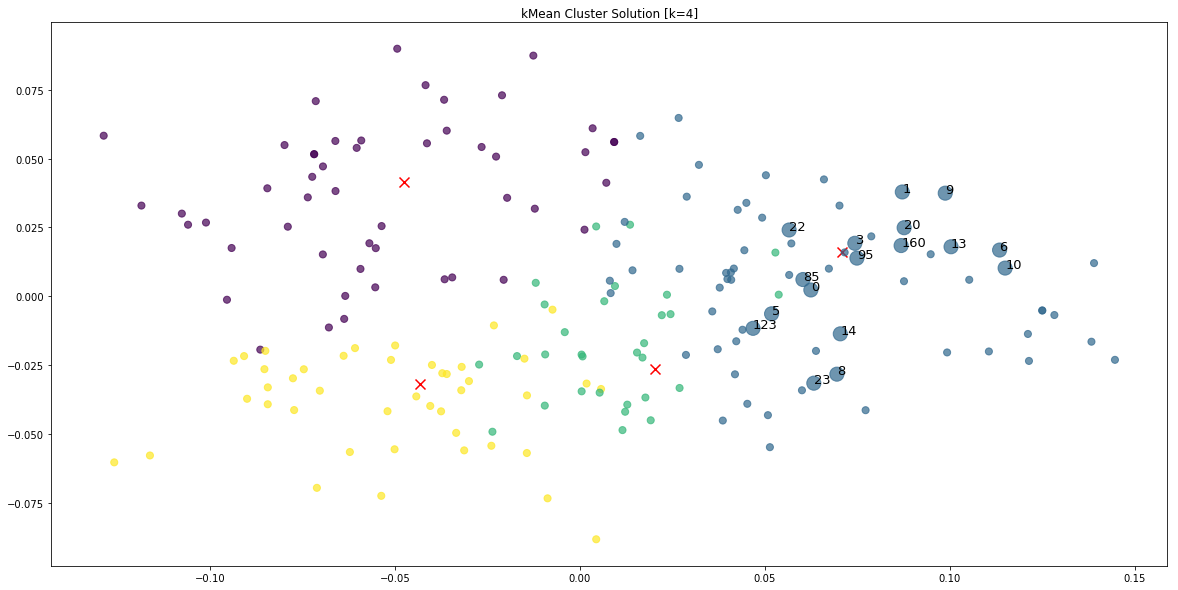

In [21]:
labels, score, ch, means = nltkClustering(vecs, nrClusters = 4, repeats=200)
clusterCardinality(labels)
updateLabels(dfCorpus,labels)   # Add labels/clusters to dataframe
surveys = []
create_plot_2D(dfCorpus, subset, surveys, chartType='pca')

## Clustering using Sklearn

Evaluation of KMeans with k-means++ init
Avgs [nc =   2] :: Inertia =  2.77715 Silhouette =  0.26823. Calinski-Harabaz = 35.46987
++ Updated best to  inf
Evaluation of KMeans with random init
Avgs [nc =   2] :: Inertia =  2.76554 Silhouette =  0.25473. Calinski-Harabaz = 36.30546
Evaluation of MiniBatchKMeans with k-means++ init
Avgs [nc =   2] :: Inertia =  2.78416 Silhouette =  0.25272. Calinski-Harabaz = 35.84053
Evaluation of MiniBatchKMeans with random init
Avgs [nc =   2] :: Inertia =  2.79193 Silhouette =  0.26455. Calinski-Harabaz = 35.10263
Evaluation of KMeans with k-means++ init
Avgs [nc =   3] :: Inertia =  2.59603 Silhouette =  0.15205. Calinski-Harabaz = 25.47552
Evaluation of KMeans with random init
Avgs [nc =   3] :: Inertia =  2.59420 Silhouette =  0.14878. Calinski-Harabaz = 25.55869
Evaluation of MiniBatchKMeans with k-means++ init
Avgs [nc =   3] :: Inertia =  2.63118 Silhouette =  0.16044. Calinski-Harabaz = 24.64380
Evaluation of MiniBatchKMeans with random init
A

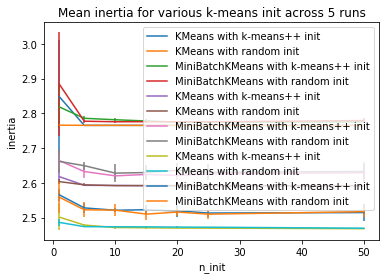

In [13]:
random_state = np.random.RandomState(0)
n_runs = 5
n_init_range = np.array([1, 5, 10, 15, 20, 25, 50])

plt.figure()
plots = []
legends = []

cases = [
    (KMeans, 'k-means++', {}),
    (KMeans, 'random', {}),
    (MiniBatchKMeans, 'k-means++', {'max_no_improvement': 3}),
    (MiniBatchKMeans, 'random', {'max_no_improvement': 3, 'init_size': 500}),
]
bestInertia = np.infty
bestCH      = 0.0
bestScore    = 0.0

for n_clusters in range(2,5):
    for factory, init, params in cases:
        avgInertia  = 0.0
        avgScore    = 0.0
        avgCH       = 0.0
        count       = 0

        print("Evaluation of %s with %s init" % (factory.__name__, init))
        inertia = np.empty((len(n_init_range), n_runs))

        for run_id in range(n_runs):
            for i, n_init in enumerate(n_init_range):
                km = factory(n_clusters=n_clusters, init=init, random_state=run_id,
                             n_init=n_init, **params).fit(vecs)
                inertia[i, run_id] = km.inertia_
                labels      = km.labels_
                score       = metrics.silhouette_score(vecs, labels, metric="cosine")
                ch          = metrics.calinski_harabaz_score(vecs, labels)
                avgInertia += km.inertia_
                avgScore   += score
                avgCH      += ch
                count      += 1
                #print("Silhouette score (nc = {0:3d}) = {1:8.5f}. Calinski-Harabaz Score = {2:8.5f}".format(n_clusters, score,ch))
    
        p = plt.errorbar(n_init_range, inertia.mean(axis=1), inertia.std(axis=1))
        plots.append(p[0])
        legends.append("%s with %s init" % (factory.__name__, init))

        avgScore /= count
        avgCH /= count
        avgInertia /= count
        print("Avgs [nc = {0:3d}] :: Inertia = {1:8.5f} Silhouette = {2:8.5f}. Calinski-Harabaz = {3:8.5f}".format(n_clusters, avgInertia, avgScore,avgCH))

        if avgScore > bestScore:
        #if avgCH > bestCH:
            bestScore   = avgScore
            bestCH      = avgCH
            bestFactory = factory
            bestCluster = n_clusters
            bestInit    = init
            print("++ Updated best to ", bestInertia)
 
        

plt.xlabel('n_init')
plt.ylabel('inertia')
plt.legend(plots, legends)
plt.title("Mean inertia for various k-means init across %d runs" % n_runs)


In [14]:
km     = bestFactory(n_clusters=bestCluster, init=bestInit, n_init=5, random_state=random_state).fit(vecs)
labels = km.labels_
score  = metrics.silhouette_score(vecs, labels, metric="cosine")
ch     = metrics.calinski_harabaz_score(vecs, labels)
means  = km.cluster_centers_

print("-"*50)
print("** Selection = ", bestFactory, "**")
print("Inertia (nc = {0:3d}) = {1:8.5f} Silhouette = {2:8.5f} Calinski-Harabaz = {3:8.5f}".format(bestCluster, km.inertia_, score, ch))

clusterCardinality(labels)

--------------------------------------------------
** Selection =  <class 'sklearn.cluster.k_means_.KMeans'> **
Inertia (nc =   2) =  2.76542 Silhouette =  0.25383 Calinski-Harabaz = 36.31529
Nr. Elements in Cluster 0 = 90
Nr. Elements in Cluster 1 = 104


[90, 104]

In [156]:
tag2label['22']
labels[19] = 3

Nr. Elements in Cluster 0 = 47
Nr. Elements in Cluster 1 = 67
Nr. Elements in Cluster 2 = 40
Nr. Elements in Cluster 3 = 40


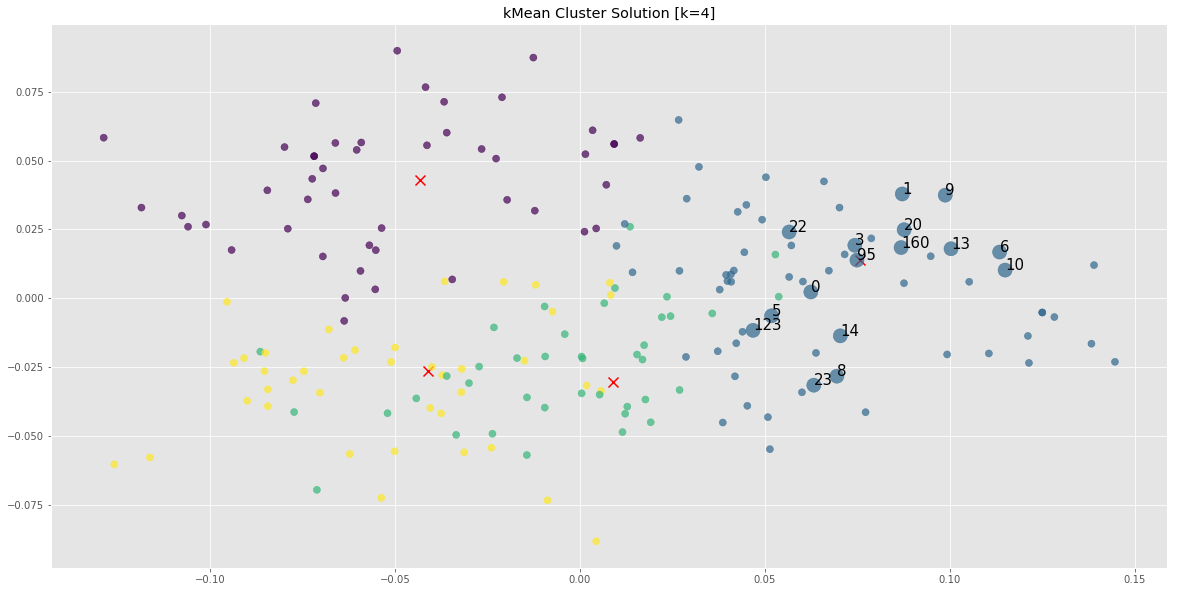

In [376]:
clusterCardinality(labels)
updateLabels(dfCorpus,labels)   # Add labels/clusters to dataframe.
create_plot_2D(dfCorpus, subset, surveys, chartType='pca')

In [22]:

X_embedded = TSNE(n_components=2, perplexity=20, n_iter=3000).fit_transform(vecs)
#X_embedded.shape

/home/mcaserta/anaconda3/lib/python3.5/site-packages/numpy/matrixlib/defmatrix.py:68: PendingDeprecationWarning: the matrix subclass is not the recommended way to represent matrices or deal with linear algebra (see https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html). Please adjust your code to use regular ndarray.
  return matrix(data, dtype=dtype, copy=False)


Nr. Elements in Cluster 0 = 50
Nr. Elements in Cluster 1 = 71
Nr. Elements in Cluster 2 = 30
Nr. Elements in Cluster 3 = 43


/home/mcaserta/anaconda3/lib/python3.5/site-packages/numpy/matrixlib/defmatrix.py:68: PendingDeprecationWarning: the matrix subclass is not the recommended way to represent matrices or deal with linear algebra (see https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html). Please adjust your code to use regular ndarray.
  return matrix(data, dtype=dtype, copy=False)


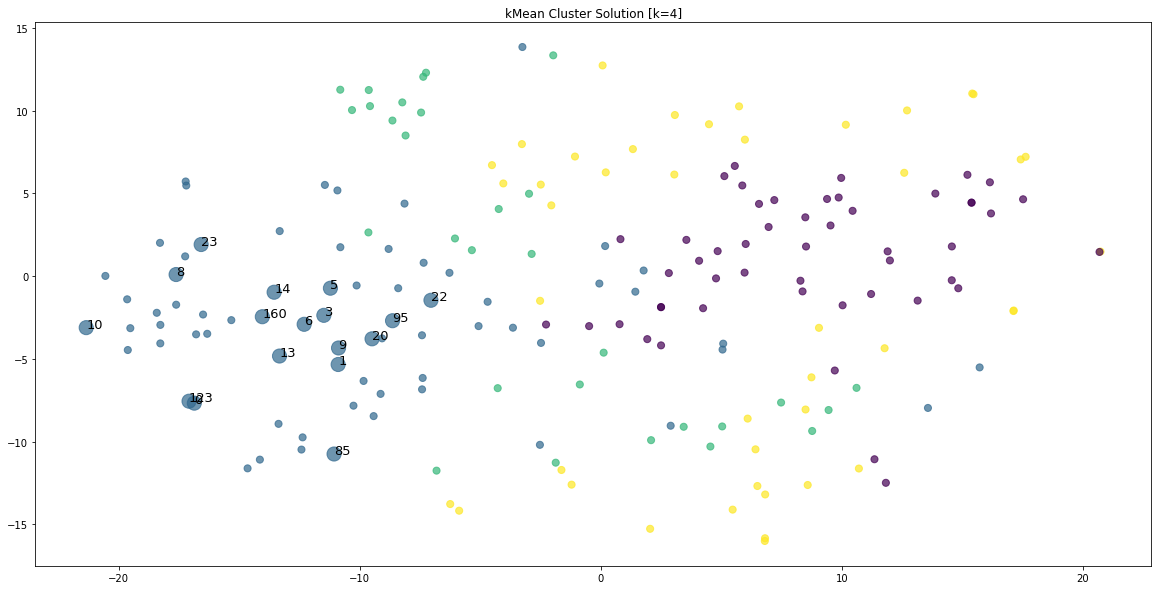

In [23]:
clusterCardinality(labels)
updateLabels(dfCorpus,labels)   # Add labels/clusters to dataframe.
create_plot_2D(dfCorpus, subset, surveys, chartType='tsne')

In [160]:
dfCorpus.to_csv("bestSol.csv")

## Using Multidimensional Scaling

Nr. Elements in Cluster 0 = 50
Nr. Elements in Cluster 1 = 68
Nr. Elements in Cluster 2 = 30
Nr. Elements in Cluster 3 = 46


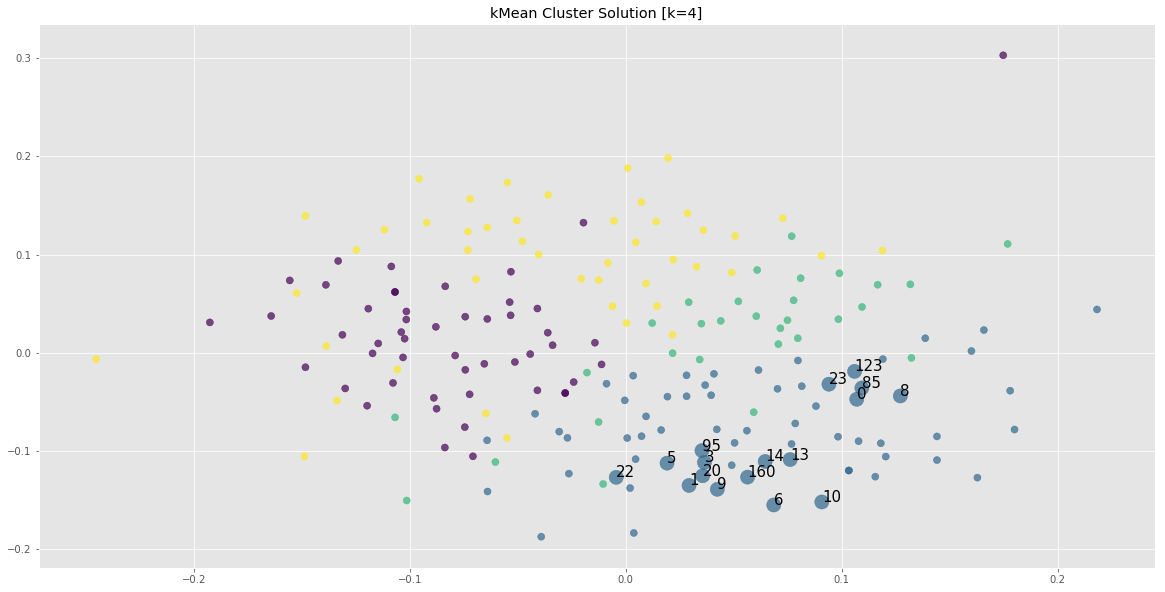

In [21]:
clusterCardinality(labels)
updateLabels(dfCorpus,labels)   # Add labels/clusters to dataframe.
create_plot_2D(dfCorpus, subset, surveys, chartType='mds')

# Distance Matrix

For a given subset of papers, we want to compute the distance matrix. We want to gain some insight about which papers are the closest ones to our subset.

In [22]:
def computeDistanceMatrix(subset, labels, set1, toDisk=False):
    """
    Note that both subset and set1 are referring to the actual TAG, or ID, of the document.
    To get the vector, we need to map them back using tag2label.
    """
    print("Target Cluster {0} has {1} documents.".format(targetCluster, len(set1)))

    mm = np.zeros((len(subset),len(set1)))
    
    for i in range(len(subset)):
        row = subset[i]
        pos = tag2label[str(row)]
        v1  = vecs[pos]
        for j in range(len(set1)):
            col = set1[j]
            pos = tag2label[str(col)]
            v2  = vecs[pos]
            
            same = False
            if (row == col):
                if sum(v1==v2) == len(v1):
                    same = True
                #print("Distance b/w {0} and {1}. Are vectors same? {2}".format(row,col,same))
            dd = round(ssd.cosine(v1,v2),4)
            mm[i][j] = dd
            if same:
                assert(dd==0.0)
                #print("... dist = ", dd)
            
    if toDisk:
        header = ",".join([str(i) for i in set1])
        np.savetxt(utils.Config.distanceMatrixFile, mm, fmt='%6.4f',delimiter=",", header=header)
        print("Distance matrix saved to disk '{0}'.".format(utils.Config.distanceMatrixFile))
                    
    return mm

def createSortedDistances(mm, subset, set1, toDisk=False):
    df = pd.DataFrame()
    
    nRow = 0
    for i in subset:
        index = set1
        dist  = mm[nRow,:]
        s     = sorted(zip(dist,index))
        sortedDists, sortedIDs = map(list, zip(*s))
        
        col_name = str(i) + ".ID"
        df[col_name] = sortedIDs
        col_name = str(i) + ".dist"
        df[col_name] = sortedDists
        nRow += 1
        
        
        
    if toDisk:
        df.to_csv(utils.Config.sortedDIstanceFile)
        print("Sorted Distances saved to disk '{0}'".format(utils.Config.sortedDIstanceFile))
        
    return df



In [24]:
label2tag,tag2label = createLabels2tags(corpus)
print([labels[tag2label[str(i)]] for i in subset])
targetCluster = labels[0] # pick cluster of document 0
set1 = [label2tag[i] for i in range(len(labels)) if labels[i] == targetCluster]
mm   = computeDistanceMatrix(subset, labels, set1, toDisk=True)
df = createSortedDistances(mm, subset, set1, toDisk=True)
    

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Target Cluster 1 has 68 documents.
Distance matrix saved to disk 'distanceMatrix.csv'.
Sorted Distances saved to disk 'sortedDistance.csv'


In [24]:
file2tag, tag2file = createMap(utils.Config.mappingFile)

Legths :: From file to TAG = 194; from TAG to file = 194


In [25]:
filename = tag2file[17]
print("Filename=",filename)
#year = "20" + filename[-2:]
#filename += ".p"
#ff = path.join(utils.Config.p_dir, year, filename)
#print("Processing file '{0}'".format(ff), "with name", name)
#doc = pickle.load(open(ff, 'rb'))
#doc

Filename= puchinger-09


In [25]:
df.to_html("sortedDistance.html")

# Experimenting with Topic Modeling

**NOTE**: Important to use the mapping between `labels` and `tags`.

In [26]:
import multiprocessing
nCores = multiprocessing.cpu_count()
print("Using ", nCores, "cores.")

Using  32 cores.


In [27]:
from gensim.models import ldamodel
from gensim.models import LdaMulticore
from gensim.corpora import Dictionary
corpus = create_corpus_core() # reset the corpus and use only the core

Legths :: From file to TAG = 194; from TAG to file = 194


## Topic Modeling per Cluster (using gensim)

### Separating per Cluster

In [29]:
warnings.filterwarnings(action='ignore')
np.random.seed(1) # setting random seed to get the same results each time.
labels = dfCorpus['label'].tolist()
nClusters = len(list(set(labels)))
for cc in range(nClusters):
    texts = dfCorpus[dfCorpus['label']==cc]['doc'].tolist()
    dictionary = Dictionary(texts)
    corpus = [dictionary.doc2bow(text) for text in texts]
    model = LdaMulticore(corpus, id2word=dictionary, num_topics=1, passes=100, workers=nCores)
    #model = LdaMulticore(corpus, id2word=dictionary, num_topics=1, passes=100)
    print("-"*50)
    print("Topics of Cluster {0} with {1:3d} documents: ".format(cc, len(texts))) 
    print(model.show_topics(num_words=20))

--------------------------------------------------
Topics of Cluster 0 with  50 documents: 
[(0, '0.017*"solution" + 0.016*"time" + 0.013*"instance" + 0.011*"set" + 0.011*"vehicle" + 0.011*"problem" + 0.009*"cost" + 0.009*"customer" + 0.008*"algorithm" + 0.008*"route" + 0.008*"number" + 0.007*"node" + 0.006*"arc" + 0.006*"constraint" + 0.006*"heuristic" + 0.005*"result" + 0.005*"value" + 0.005*"model" + 0.005*"best" + 0.005*"matheuristic"')]
--------------------------------------------------
Topics of Cluster 1 with  68 documents: 
[(0, '0.024*"solution" + 0.017*"problem" + 0.012*"algorithm" + 0.010*"instance" + 0.009*"set" + 0.008*"heuristic" + 0.008*"method" + 0.007*"value" + 0.007*"time" + 0.007*"approach" + 0.006*"metaheuristic" + 0.006*"used" + 0.006*"variable" + 0.005*"result" + 0.005*"number" + 0.005*"neighborhood" + 0.005*"best" + 0.005*"constraint" + 0.005*"search" + 0.005*"model"')]
--------------------------------------------------
Topics of Cluster 2 with  30 documents: 
[(

Let us now get three topics for the entire corpus and, next, the probability that a topic is found in a document. We can observe that the three topics we extract from the entire corpus somehow match the three topics we created when screening each cluster individually. Roughly, we observe:
- topic 1: Model-based approaches: Papers in which the focus is on the model, the formulation. Keywords here are: model, cost. Interestingly, the word `algorithm` does not appear. In addion, the word `vehicle` appears. There must be a prevalence of vrp-based problems.
- topic 2: Method-based approaches. The focus here is on the method, more specifically, but not exclusively on MIP-based approaches. Keywords here are: method, approach, heuristic, but the word `time` does not appear here.
- topic 3: Result-based approaches: These papers focus on the performance of the proposed algorithm. Keywords here are time and results, along with value, constraint.

### Using the Entire Corpus

In [30]:
texts = dfCorpus['doc'].tolist()
dictionary = Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]
model = LdaMulticore(corpus, id2word=dictionary, num_topics=4, passes=100, workers=nCores)
#model = ldamodel.LdaModel(corpus, id2word=dictionary, num_topics=3, passes=10, workers=nCores)
print("-"*50)
print("Topics of entire corpus with {0:3d} documents: ".format(len(texts))) 
print(model.show_topics())

--------------------------------------------------
Topics of entire corpus with 194 documents: 
[(0, '0.013*"problem" + 0.013*"model" + 0.011*"time" + 0.011*"cost" + 0.011*"solution" + 0.008*"instance" + 0.008*"number" + 0.008*"set" + 0.007*"constraint" + 0.007*"period"'), (1, '0.023*"solution" + 0.016*"problem" + 0.014*"instance" + 0.013*"time" + 0.010*"set" + 0.010*"algorithm" + 0.009*"value" + 0.008*"heuristic" + 0.007*"number" + 0.007*"variable"'), (2, '0.020*"time" + 0.016*"solution" + 0.014*"instance" + 0.012*"set" + 0.012*"problem" + 0.011*"vehicle" + 0.011*"route" + 0.010*"customer" + 0.010*"cost" + 0.008*"algorithm"'), (3, '0.020*"solution" + 0.019*"problem" + 0.015*"algorithm" + 0.011*"approach" + 0.010*"metaheuristic" + 0.007*"set" + 0.007*"search" + 0.007*"used" + 0.007*"method" + 0.006*"variable"')]


This is also interesting. From here, we can actually see how polyfacetic a paper is. While we have to uniquely classify a paper and assign it to one of the clusters, it is possible to compute the probability of observing each one of the three topics. For example:
- document 4 is assigned to cluster 1, i.e., the `method-based` cluster. However, we also observe that some features of the other two groups appear. This is not the case with, e.g., document 2, which is uniquely assigned to cluster 2.

## Topic Modeling using Abstracts Only

Finally, we repeat the same cluster analysis on the abstracts only. We repeat the double approach, first segmenting the abstracts per cluster and, next, working on the whole set.

In [57]:
def create_corpus_abstract():
    
    file2tag, tag2file = createMap(utils.Config.mappingFile)
    analyzedDocument = namedtuple('AnalyzedDocument','words tags')
    year0 = "2001"
    yearT = "2019"
    yearSet = list(range(int(year0), int(yearT)+1))

    corpus = []
    counter  = 0
    txt = []
    for year in yearSet:
        #print("** Year = ", year, "**", counter)

        listOfFiles = glob.glob(path.join(utils.Config.prefix,utils.Config.pAbstract_dir,str(year),"*.p"))

        for pFile in listOfFiles:

            #print("Opening FILE = ", pFile)
            filename = os.path.basename(pFile)
            name, file_extension = os.path.splitext(filename)
            name = name[:-4]
            if os.path.isfile(pFile):
                ff = path.join(utils.Config.pAbstract_dir, str(year), filename)
                #print("Processing file '{0}'".format(ff))
                #doc = pickle.load(open(ff, 'rb'))
                pFile = open(ff, 'rb')
                doc   = pickle.load(pFile)
                pFile.close()

                tags = [str(file2tag[name])]
                #print("... TAG = ", tags, " :: document length = ", len(doc), "words.")
                #print(doc)
                corpus.append(analyzedDocument(doc,tags))
                df.loc[counter] = [tags, year, name, len(doc)]   
                counter += 1
                
            else:
                print("** NOTE: File {0} not found!".format(filename))

    return corpus



In [59]:
df        = pd.DataFrame(columns=['id', 'year', 'name', 'nrWords'])
#corpus = create_corpus_abstract()

np.random.seed(1) # setting random seed to get the same results each time.
nClusters = len(list(set(labels)))
for cc in range(nClusters):
    corpus = create_corpus_abstract() # reset the corpus and use only the core
    texts = []
    for i in range(len(corpus)):
        if labels[i] == cc:
            pos = int(label2tag[i])
            texts.append(corpus[pos][0])

    dictionary = Dictionary(texts)
    corpus = [dictionary.doc2bow(text) for text in texts]
    model = LdaMulticore(corpus, id2word=dictionary, num_topics=1, passes=100, workers=nCores)
    print("-"*50)
    print("[ABSTRACT BASED] Topics of Cluster {0} with {1:3d} documents: ".format(cc, len(texts))) 
    print(model.show_topics())

Legths :: From file to TAG = 194; from TAG to file = 194


/home/mcaserta/anaconda3/lib/python3.5/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.



--------------------------------------------------
[ABSTRACT BASED] Topics of Cluster 0 with  57 documents: 
[(0, '0.022*"problem" + 0.015*"matheuristic" + 0.012*"solution" + 0.009*"instance" + 0.007*"approach" + 0.007*"time" + 0.007*"method" + 0.007*"model" + 0.006*"based" + 0.006*"set"')]
Legths :: From file to TAG = 194; from TAG to file = 194
--------------------------------------------------
[ABSTRACT BASED] Topics of Cluster 1 with  68 documents: 
[(0, '0.023*"problem" + 0.015*"solution" + 0.011*"approach" + 0.009*"algorithm" + 0.008*"matheuristic" + 0.008*"heuristic" + 0.008*"time" + 0.007*"mixed-integer-programming" + 0.007*"model" + 0.007*"instance"')]
Legths :: From file to TAG = 194; from TAG to file = 194
--------------------------------------------------
[ABSTRACT BASED] Topics of Cluster 2 with  69 documents: 
[(0, '0.024*"problem" + 0.013*"matheuristic" + 0.010*"solution" + 0.009*"approach" + 0.009*"time" + 0.009*"model" + 0.009*"instance" + 0.008*"proposed" + 0.008*"res

The following is not entirely clear to me.

In [61]:
corpus = create_corpus_abstract() # reset the corpus and use only the core
texts = []
for i in range(len(corpus)):
    texts.append(corpus[i][0])

dictionary = Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]
model = LdaMulticore(corpus, id2word=dictionary, num_topics=3, passes=50, workers=nCores)
#model = ldamodel.LdaModel(corpus, id2word=dictionary, num_topics=3, passes=10, workers=nCores)
print("-"*50)
print("[ABSTRACT BASED] Topics of entire corpus with {0:3d} documents: ".format(len(texts))) 
print(model.show_topics())

Legths :: From file to TAG = 194; from TAG to file = 194


/home/mcaserta/anaconda3/lib/python3.5/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.



--------------------------------------------------
[ABSTRACT BASED] Topics of entire corpus with 194 documents: 
[(0, '0.019*"problem" + 0.013*"matheuristic" + 0.011*"cost" + 0.010*"model" + 0.010*"care" + 0.009*"vehicle" + 0.009*"health" + 0.009*"result" + 0.009*"depot" + 0.008*"home"'), (1, '0.029*"problem" + 0.017*"solution" + 0.015*"matheuristic" + 0.013*"approach" + 0.012*"instance" + 0.011*"time" + 0.011*"algorithm" + 0.008*"heuristic" + 0.008*"method" + 0.008*"based"'), (2, '0.023*"problem" + 0.015*"solution" + 0.013*"model" + 0.010*"proposed" + 0.010*"matheuristic" + 0.009*"approach" + 0.009*"based" + 0.007*"set" + 0.007*"method" + 0.007*"paper"')]


## Topic Modeling for One Cluster Only

Now, let us try to work on the cluster with the method-based approaches.

In [32]:
targetCluster = labels[0]
print("** TARGET CLUSTER = ", targetCluster, " **")
np.random.seed(1) # setting random seed to get the same results each time.
texts = dfCorpus[dfCorpus['label']==targetCluster]['doc']
tags  = dfCorpus[dfCorpus['label']==targetCluster].index.tolist()
#for cc in range(nClusters):
dictionary = Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]
#model = LdaMulticore(corpus, id2word=dictionary, num_topics=1, passes=100, workers=nCores)
model = LdaMulticore(corpus, id2word=dictionary, num_topics=4, passes=50, workers=nCores, per_word_topics=True)
print("-"*50)
print("Topics of Cluster {0} with {1:3d} documents: ".format(targetCluster, len(texts))) 
print(model.show_topics())

** TARGET CLUSTER =  1  **
--------------------------------------------------
Topics of Cluster 1 with  68 documents: 
[(0, '0.020*"solution" + 0.019*"problem" + 0.014*"instance" + 0.014*"heuristic" + 0.011*"set" + 0.010*"time" + 0.009*"algorithm" + 0.008*"method" + 0.008*"result" + 0.008*"facility"'), (1, '0.026*"solution" + 0.019*"problem" + 0.016*"algorithm" + 0.014*"metaheuristic" + 0.011*"approach" + 0.009*"search" + 0.007*"method" + 0.007*"variable" + 0.007*"neighborhood" + 0.007*"used"'), (2, '0.027*"solution" + 0.017*"instance" + 0.012*"value" + 0.012*"problem" + 0.012*"set" + 0.010*"time" + 0.009*"algorithm" + 0.009*"method" + 0.008*"mixed-integer-programming" + 0.008*"heuristic"'), (3, '0.021*"problem" + 0.017*"solution" + 0.014*"set" + 0.013*"algorithm" + 0.010*"proposed" + 0.008*"model" + 0.008*"used" + 0.008*"method" + 0.007*"number" + 0.007*"time"')]


Now, since topic 2 above seems to be the one more "method-based", we identify the papers with a high loading on topic 2.

In [33]:
file2tag, tag2file = createMap(utils.Config.mappingFile)
df = pd.DataFrame(columns=['id', 'year', 'name', 'p0','p1','p2', 'p3', 'p4'])
all_topics = model.get_document_topics(corpus, per_word_topics=True)
probs   = []
topics  = []
counter = 0
for doc_topics, word_topics, phi_values in all_topics:
    
    tag = tags[counter]
    if int(tag) not in subset:  # select only docs in subset
        counter += 1
        continue
        
    name = dfCorpus.loc[tag]['name']
    year = "20"+ name[-2:]
    print('Document {0:20s}-{1} topics: {2}'.format(name,tag, doc_topics))
    maxP = 0.0
    pp = [0.0]*5
    
    for i,p in doc_topics:
        pp[i] = p
        if p > maxP:
            maxP = p
            maxI = i
    probs.append(maxP)
    topics.append(maxI)
    df.loc[counter] = [tags[counter][0], year, name, pp[0], pp[1], pp[2], pp[3], pp[4]]
    
    counter += 1
df.to_csv("clusterMethod.csv")

Legths :: From file to TAG = 194; from TAG to file = 194
Document taillard-01         -0 topics: [(3, 0.99595755)]
Document hansen-01           -1 topics: [(0, 0.9957157)]
Document fischetti-03        -3 topics: [(1, 0.372511), (2, 0.62238556)]
Document fischetti-04        -5 topics: [(0, 0.0894133), (1, 0.3666169), (2, 0.5438675)]
Document danna-05            -6 topics: [(1, 0.60883975), (2, 0.3910244)]
Document sniedovich-06       -8 topics: [(0, 0.67409974), (1, 0.31777063)]
Document hansen-06           -9 topics: [(0, 0.15531997), (1, 0.060063347), (2, 0.7844762)]
Document rothberg-07         -10 topics: [(1, 0.90852773), (2, 0.09118961)]
Document puchinger-08        -13 topics: [(1, 0.5351638), (2, 0.46415597)]
Document fischetti-09        -14 topics: [(1, 0.31351236), (2, 0.68471223)]
Document angeletti-10        -22 topics: [(0, 0.010638844), (1, 0.027655084), (2, 0.96158534)]
Document lazic-10            -20 topics: [(1, 0.037662223), (2, 0.9609356)]
Document pinheiro-11       

## Pearson Correlation Between Documents

In [34]:
import scipy.stats as stats
import seaborn as sns
import matplotlib.gridspec as gridspec

In [41]:
file2tag, tag2file = createMap(utils.Config.mappingFile)

Legths :: From file to TAG = 194; from TAG to file = 194


In [224]:
np.random.seed(1) # setting random seed to get the same results each time.

models = []
tagTarget = file2tag["fischetti-03"]
#tagDocs = [file2tag["danna-05"], file2tag["sniedovich-06"], file2tag["hansen-01"], file2tag["hansen-06"]]
tagDocs = [file2tag["danna-05"], file2tag["sniedovich-06"]]
    
# get the target file
texts = []
texts.append(dfCorpus.loc[str(tagTarget)]['doc'])
dictionary = Dictionary(texts)
bow = [dictionary.doc2bow(text) for text in texts]
mTarget = LdaMulticore(bow, id2word=dictionary, num_topics=1, passes=100, workers=nCores)
print("-"*50)
print("Topics of Target Document {0} with {1:3d} documents: ".format(tagTarget, len(texts))) 
print(mTarget.show_topics())

#for pos in positions:
for tag in tagDocs:
    texts = []
    texts.append(dfCorpus.loc[str(tag)]['doc'])
    dictionary = Dictionary(texts)
    bow        = [dictionary.doc2bow(text) for text in texts]
    mAux       = LdaMulticore(bow, id2word=dictionary, num_topics=1, passes=100, workers=nCores)
    print("-"*50)
    print("Topics of Document {0} with {1} documents: ".format(tag, len(texts))) 
    print(mAux.show_topics())
    models.append(mAux)


--------------------------------------------------
Topics of Target Document 3 with   1 documents: 
[(0, '0.032*"solution" + 0.016*"local-branching" + 0.014*"mixed-integer-programming" + 0.012*"node" + 0.012*"constraint" + 0.011*"instance" + 0.010*"time-limit" + 0.009*"heuristic" + 0.009*"case" + 0.008*"solver"')]
--------------------------------------------------
Topics of Document 6 with 1 documents: 
[(0, '0.035*"solution" + 0.019*"relaxation-induced-neighborhood-search" + 0.017*"local-branching" + 0.016*"mixed-integer-programming" + 0.014*"model" + 0.012*"sub-mip" + 0.011*"neighborhood" + 0.010*"method" + 0.009*"variable" + 0.009*"incumbent"')]
--------------------------------------------------
Topics of Document 8 with 1 documents: 
[(0, '0.023*"neighborhood" + 0.021*"method" + 0.013*"problem" + 0.013*"dynamic-programming" + 0.012*"corridor-method" + 0.012*"city" + 0.009*"constraint" + 0.009*"optimization" + 0.009*"example" + 0.008*"solution"')]


In [227]:
gs = gridspec.GridSpec(2,1)
ax =[0]*len(tagDocs)
gs.update(left=0.05,wspace=0.25,hspace=0.5)


**NOTE**: To use this part, we need to load the model `ft`.

Topics for doc  0  =  [(0, [('solution', 0.034704912), ('relaxation-induced-neighborhood-search', 0.01870324), ('local-branching', 0.017456362), ('mixed-integer-programming', 0.016417293), ('model', 0.014131338), ('sub-mip', 0.0120532), ('neighborhood', 0.01142976), ('method', 0.009767248), ('variable', 0.00872818), ('incumbent', 0.00872818)])]
Topics for doc  1  =  [(0, [('neighborhood', 0.023295578), ('method', 0.020944644), ('problem', 0.013464417), ('dynamic-programming', 0.012609531), ('corridor-method', 0.0119683705), ('city', 0.011540928), ('constraint', 0.009403717), ('optimization', 0.009189999), ('example', 0.008976278), ('solution', 0.008335115)])]


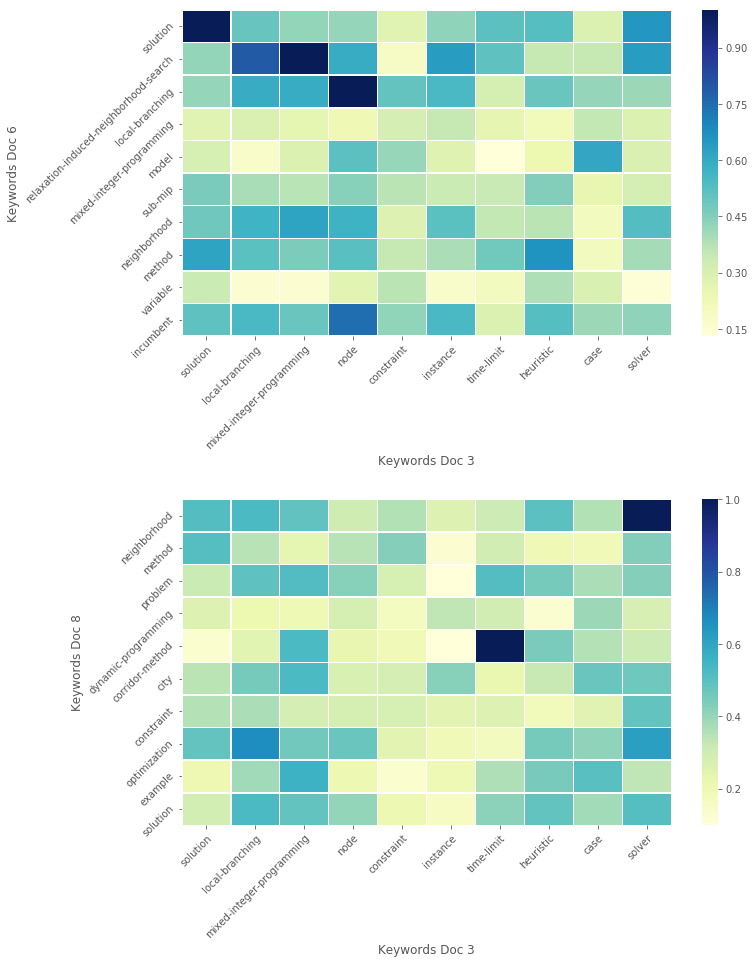

In [231]:
plt.figure(figsize=(10,15))
tot_words = 10
all_topics =  mTarget.show_topics(num_words=tot_words, formatted=False)
wordsTarget = []
for i in range(tot_words):
    wordsTarget.append(all_topics[0][1][i][0])
vTarget = dfCorpus.loc[str(tagTarget)]['vec']

for i in range(len(tagDocs)):
    all_topics =  models[i].show_topics(num_words=tot_words, formatted=False)
    print("Topics for doc ", i, " = ", all_topics)
    wordsAux = []
    for k in range(tot_words):
        wordsAux.append(all_topics[0][1][k][0])
        
    rMatrix = [ [stats.pearsonr(model[w1], model[w2])[0] for w2 in wordsAux ] for w1 in wordsTarget]

    #if i < 2:
    #    ax[i] = plt.subplot(gs[0,i])
    #else:
    #    ax[i] = plt.subplot(gs[1,i-2])
    ax[i] = plt.subplot(gs[i,0])
    ax[i] = sns.heatmap(rMatrix, linewidth=0.5, cmap="YlGnBu")
    ax[i].set_xticklabels(wordsTarget)
    ax[i].set_yticklabels(wordsAux)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax[i].get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    plt.setp(ax[i].get_yticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    vDoc = dfCorpus.loc[str(tagDocs[i])]['vec']
    correl = round(stats.pearsonr(vTarget,vDoc)[0],3)
    msg = "r("+ str(tagTarget) + "," + str(tagDocs[i]) +  ") = " + str(correl)
    #ax[i].set_title(msg)
    ax[i].set_xlabel("Keywords Doc " + str(tagTarget))
    ax[i].set_ylabel("Keywords Doc " + str(tagDocs[i]))

plt.show()

## Sklearn for Topic Modeling

In [73]:
# Sklearn
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from pprint import pprint
import multiprocessing
nCores = multiprocessing.cpu_count()
print("Using ", nCores, "cores.")

Using  32 cores.


In [37]:
label2tag,tag2label = createLabels2tags(corpus)

In [194]:
nTopics = 1
nWords  = 30
vectorizer = CountVectorizer(analyzer='word',       
                     min_df=5,                        # minimum reqd occurences of a word 
                    )
    # Build LDA Model
lda_model = LatentDirichletAllocation(n_components=nTopics,            # Number of topics
                                      max_iter=100,               # Max learning iterations
                                      learning_method='batch',   
                                      random_state=100,          # Random state
                                      batch_size=200,            # n docs in each learning iter
                                      evaluate_every = -1,       # compute perplexity every n iters, default: Don't
                                      n_jobs = nCores,               # Use all available CPUs
                                     )


# Show top n keywords for each topic
def show_topics(vectorizer=vectorizer, lda_model=lda_model, n_words=20):
    keywords = np.array(vectorizer.get_feature_names())
    topic_keywords = []
    for topic_weights in lda_model.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords

Let us try first with the division imposed by the labeling of the cluster algorithm.

In [154]:
warnings.filterwarnings(action='ignore')
np.random.seed(1) # setting random seed to get the same results each time.

labels = dfCorpus['label'].tolist()
df     = pd.DataFrame(columns=['Word '+str(i) for i in range(nWords)])

targetCluster = labels[0]
print("** TARGET CLUSTER = ", targetCluster, " **")
nClusters = len(list(set(labels)))
clusters = list(set(labels))

counter = 0
for cc in clusters:
    print("-"*60)
    print("** Cluster Nr. ", cc)
    print("-"*60)

    tempText = dfCorpus[dfCorpus['label']==cc]['doc'].tolist()
    tags     = dfCorpus[dfCorpus['label']==cc].index.tolist()
    
    texts = []
    #i = 0
    for doc in tempText:
        tt = ' '.join(doc)
        tt = re.sub('-','_',tt)
        texts.append(tt)
        #print("Adding doc", tags[i])
        #i += 1

    data_vectorized = vectorizer.fit_transform(texts)
    lda_output      = lda_model.fit_transform(data_vectorized)
    # Log Likelyhood: Higher the better
    print("Log Likelihood: ", lda_model.score(data_vectorized))

    # Perplexity: Lower the better. Perplexity = exp(-1. * log-likelihood per word)
    print("Perplexity: ", lda_model.perplexity(data_vectorized))

    #print(lda_model)  # Model attributes

    topic_keywords = show_topics(vectorizer=vectorizer, lda_model=lda_model, n_words=nWords) 
    for topic in range(nTopics):
        df.loc[counter] = topic_keywords[topic]
        counter += 1


** TARGET CLUSTER =  1  **
------------------------------------------------------------
** Cluster Nr.  0
------------------------------------------------------------
Log Likelihood:  -909054.6035630194
Perplexity:  451.8110837133197
------------------------------------------------------------
** Cluster Nr.  1
------------------------------------------------------------
Log Likelihood:  -1277547.1016236565
Perplexity:  591.1603857069601
------------------------------------------------------------
** Cluster Nr.  2
------------------------------------------------------------
Log Likelihood:  -325341.2795656637
Perplexity:  235.06112793911657
------------------------------------------------------------
** Cluster Nr.  3
------------------------------------------------------------
Log Likelihood:  -852201.105740703
Perplexity:  448.7926132933705


In [155]:
df.to_csv("topics.csv")

## Grid Search for LDA

Double check whether the data used is the entire corpus or just the cluster containing the subset:
- Run the following chunck if we want to use only the docs in the target cluster
- Leave it as it is if we want to use the entire corpus (inherited from above)

In [195]:
labels = dfCorpus['label'].tolist()

targetCluster = labels[0]
print("** TARGET CLUSTER = ", targetCluster, " **")
nClusters = len(list(set(labels)))
clusters = list(set(labels))

useSubsetOnly = True
if useSubsetOnly == True:
    subsetString = [str(i) for i in subset]
    tempText = dfCorpus.loc[subsetString]['doc'].tolist()
    tags     = subsetString
    names    = dfCorpus.loc[subsetString]['name'].tolist()
else:
    tempText = dfCorpus[dfCorpus['label']==targetCluster]['doc'].tolist()
    tags     = dfCorpus[dfCorpus['label']==targetCluster].index.tolist()
    names    = dfCorpus[dfCorpus['label']==targetCluster]['name'].tolist()

texts = []
#i = 0
for doc in tempText:
    tt = ' '.join(doc)
    tt = re.sub('-','_',tt)
    texts.append(tt)
    #print("Adding doc", tags[i])
    #i += 1

vectorizer = CountVectorizer(analyzer='word', min_df=5)
data_vectorized = vectorizer.fit_transform(texts)
print("Vectorized", len(texts),"documents.")

** TARGET CLUSTER =  1  **
Vectorized 16 documents.


In [197]:
warnings.filterwarnings(action='ignore')
# Define Search Param
search_params = {'n_components': [3,4,5,6,10], 'learning_decay': [.5, .7, .9]}

# Init the Model
lda = LatentDirichletAllocation(learning_method='batch',max_iter=100,n_jobs=nCores)

# Init Grid Search Class
model = GridSearchCV(lda, param_grid=search_params)

# Do the Grid Search
model.fit(data_vectorized)

GridSearchCV(cv=None, error_score='raise',
       estimator=LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='batch', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=100, mean_change_tol=0.001,
             n_components=10, n_jobs=32, n_topics=None, perp_tol=0.1,
             random_state=None, topic_word_prior=None,
             total_samples=1000000.0, verbose=0),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'learning_decay': [0.5, 0.7, 0.9], 'n_components': [3, 4, 5, 6, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [198]:
# Best Model
best_lda_model = model.best_estimator_
#best_lda_model = lda_model

# Model Parameters
print("Best Model's Params: ", model.best_params_)

# Log Likelihood Score
print("Best Log Likelihood Score: ", model.best_score_)

# Perplexity
print("Model Perplexity: ", best_lda_model.perplexity(data_vectorized))

Best Model's Params:  {'learning_decay': 0.7, 'n_components': 3}
Best Log Likelihood Score:  -84735.86451733735
Model Perplexity:  420.9585260857608


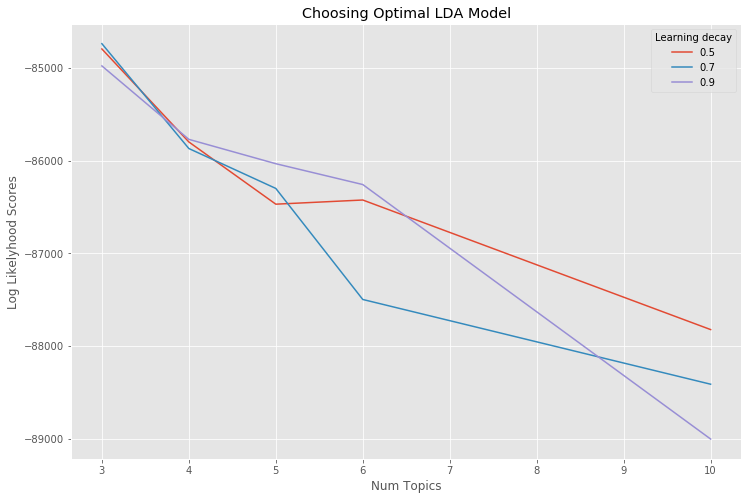

In [199]:
# Get Log Likelyhoods from Grid Search Output
n_topics = [3,4,5,6,10]
log_likelyhoods_5 = [round(gscore.mean_validation_score) for gscore in model.grid_scores_ if gscore.parameters['learning_decay']==0.5]
log_likelyhoods_7 = [round(gscore.mean_validation_score) for gscore in model.grid_scores_ if gscore.parameters['learning_decay']==0.7]
log_likelyhoods_9 = [round(gscore.mean_validation_score) for gscore in model.grid_scores_ if gscore.parameters['learning_decay']==0.9]

# Show graph
plt.figure(figsize=(12, 8))
plt.plot(n_topics, log_likelyhoods_5, label='0.5')
plt.plot(n_topics, log_likelyhoods_7, label='0.7')
plt.plot(n_topics, log_likelyhoods_9, label='0.9')
plt.title("Choosing Optimal LDA Model")
plt.xlabel("Num Topics")
plt.ylabel("Log Likelyhood Scores")
plt.legend(title='Learning decay', loc='best')
plt.show()

In [188]:
print(best_lda_model.n_components)

3


In [120]:
file2tag, tag2file = createMap(utils.Config.mappingFile)

Legths :: From file to TAG = 194; from TAG to file = 194


In [207]:
#best_lda_model = lda_model
# Create Document - Topic Matrix
lda_output = best_lda_model.transform(data_vectorized)


# column names
topicnames = ["Topic" + str(i) for i in range(best_lda_model.n_components)]

# index names (taken from above, where the set of papers to be used is defined)
docnames = names

# Make the pandas dataframe
df_document_topic = pd.DataFrame(np.round(lda_output, 2), columns=topicnames, index=docnames)

# Get dominant topic for each document
dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic

# Styling
def color_green(val):
    color = 'green' if val > .1 else 'black'
    return 'color: {col}'.format(col=color)

def make_bold(val):
    weight = 700 if val > .1 else 400
    return 'font-weight: {weight}'.format(weight=weight)

# Apply Style
#df_document_topics = df_document_topic.head(25).style.applymap(color_green).applymap(make_bold)

# select papers we want to focus on
useSubsetOnly = True
# CASE 1. only the subset
#==========================
if useSubsetOnly==True:
    namesSubset = [dfCorpus.loc[str(i)]['name'] for i in subset]
    df_document_topic = df_document_topic.loc[namesSubset]
else:
# CASE 2. All the papers in target cluster
#==========================
    subsetCluster = dfCorpus[dfCorpus['label']==targetCluster]['name'].tolist()
    df_document_topic = df_document_topic.loc[subsetCluster]

df_document_topics = df_document_topic.head(50).style.applymap(color_green).applymap(make_bold)
df_document_topics
#df_document_topics.to_excel("tableLoading.xlsx")

,Topic0,Topic1,Topic2,dominant_topic
taillard-01,1,0,0,0
hansen-01,1,0,0,0
fischetti-03,0,0,1,2
fischetti-04,0,0,1,2
danna-05,0,0,1,2
sniedovich-06,0,1,0,1
hansen-06,0.49,0,0.51,2
rothberg-07,0,0.17,0.83,2
puchinger-08,0.21,0.38,0.41,2
fischetti-09,0,0.07,0.93,2


In [204]:
df_topic_distribution = df_document_topic['dominant_topic'].value_counts().reset_index(name="Num Documents")
df_topic_distribution.columns = ['Topic Num', 'Num Documents']
df_topic_distribution

,Topic Num,Num Documents
0,2,9
1,1,4
2,0,3


In [192]:
pyLDAvis.enable_notebook()
panel = pyLDAvis.sklearn.prepare(best_lda_model, data_vectorized, vectorizer, mds='tsne')
panel

PreparedData(topic_coordinates=            Freq  cluster  topics           x           y
topic                                                    
0      44.525174        1       1 -372.142456 -195.243271
2      32.593970        1       2 -437.769562 -443.703552
1      22.880856        1       3 -620.127258 -262.638367, topic_info=     Category        Freq            Term        Total  loglift  logprob
term                                                                    
42    Default  493.000000          method   493.000000  30.0000  30.0000
52    Default  810.000000         problem   810.000000  29.0000  29.0000
12    Default  280.000000      constraint   280.000000  28.0000  28.0000
28    Default  563.000000       heuristic   563.000000  27.0000  27.0000
36    Default  180.000000           large   180.000000  26.0000  26.0000
46    Default  179.000000    optimization   179.000000  25.0000  25.0000
71    Default  524.000000            time   524.000000  24.0000  24.0000
41    Default  104.000000   metaheuristic   104.000000  23.0000  23.0000
18    Default   99.000000         example    99.000000  22.0000  22.0000
34    Default  626.000000        instance   626.000000  21.0000  21.0000
7     Default  211.000000            case   211.000000  20.0000  20.0000
67    Default  142.000000            step   142.000000  19.0000  19.0000
78    Default  116.000000             way   116.000000  18.0000  18.0000
68    Default   89.000000       structure    89.000000  17.0000  17.0000
74    Default  274.000000            used   274.000000  16.0000  16.0000
26    Default  198.000000           given   198.000000  15.0000  15.0000
59    Default  162.000000            size   162.000000  14.0000  14.0000
10    Default   85.000000        consider    85.000000  13.0000  13.0000
5     Default  255.000000            best   255.000000  12.0000  12.0000
38    Default   82.000000             let    82.000000  11.0000  11.0000
77    Default  449.000000        variable   449.000000  10.0000  10.0000
25    Default  159.000000         general   159.000000   9.0000   9.0000
65    Default   81.000000           space    81.000000   8.0000   8.0000
27    Default   77.000000            good    77.000000   7.0000   7.0000
4     Default  119.000000           based   119.000000   6.0000   6.0000
76    Default  488.000000           value   488.000000   5.0000   5.0000
6     Default  160.000000          better   160.000000   4.0000   4.0000
49    Default   56.000000      particular    56.000000   3.0000   3.0000
23    Default   92.000000       following    92.000000   2.0000   2.0000
22    Default   74.000000          follow    74.000000   1.0000   1.0000
...       ...         ...             ...          ...      ...      ...
7      Topic3  109.273658            case   211.224013   0.8158  -3.4198
27     Topic3   39.081103            good    77.641481   0.7884  -4.4480
8      Topic3   22.409966          choice    44.805883   0.7820  -5.0041
22     Topic3   35.378404          follow    74.770748   0.7265  -4.5475
40     Topic3   25.959486            mean    55.819456   0.7093  -4.8571
65     Topic3   37.511311           space    81.890479   0.6941  -4.4890
35     Topic3   16.638208    introduction    37.829662   0.6535  -5.3019
29     Topic3   32.827767            idea    74.769259   0.6517  -4.6224
4      Topic3   52.153098           based   119.551348   0.6453  -4.1594
60     Topic3   36.775444           small    84.670806   0.6409  -4.5088
59     Topic3   66.987908            size   162.519275   0.5886  -3.9091
23     Topic3   37.396580       following    92.469000   0.5696  -4.4921
26     Topic3   79.588656           given   198.351546   0.5617  -3.7368
74     Topic3  101.451010            used   274.799591   0.4784  -3.4941
2      Topic3   13.437716           apply    37.820910   0.4401  -5.5156
50     Topic3   16.903183         present    47.748440   0.4364  -5.2861
30     Topic3   27.447596  implementation    78.733910   0.4211  -4.8014
37     Topic3   1

In [202]:
# Show top n keywords for each topic
def show_topics(vectorizer=vectorizer, lda_model=lda_model, n_words=20):
    keywords = np.array(vectorizer.get_feature_names())
    topic_keywords = []
    for topic_weights in lda_model.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords

topic_keywords = show_topics(vectorizer=vectorizer, lda_model=best_lda_model, n_words=25)        

# Topic - Keywords Dataframe
df_topic_keywords = pd.DataFrame(topic_keywords)
df_topic_keywords.columns = ['Word '+str(i) for i in range(df_topic_keywords.shape[1])]
df_topic_keywords.index = ['Topic '+str(i) for i in range(df_topic_keywords.shape[0])]
df_topic_keywords


,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,...,Word 15,Word 16,Word 17,Word 18,Word 19,Word 20,Word 21,Word 22,Word 23,Word 24
Topic 0,problem,solution,time,method,variable_neighborhood_search,part,variable_neighborhood_decomposition_search,instance,vnd,set,...,number,value,average,large,best,parameter,result,obtained,solving,tabu_search
Topic 1,problem,heuristic,solution,instance,neighborhood,method,set,diving,time,value,...,best,table,constraint,parameter,average,number,linear_programming,metaheuristic,case,generated
Topic 2,solution,mixed_integer_programming,variable,instance,local_branching,value,node,set,heuristic,problem,...,method,algorithm,neighborhood,integer,solver,result,gap,relaxation_induced_neighborhood_search,relaxation,general


In [203]:
df_topic_keywords.to_csv("topicsSubset.csv")